### AutoML Test - pycaret

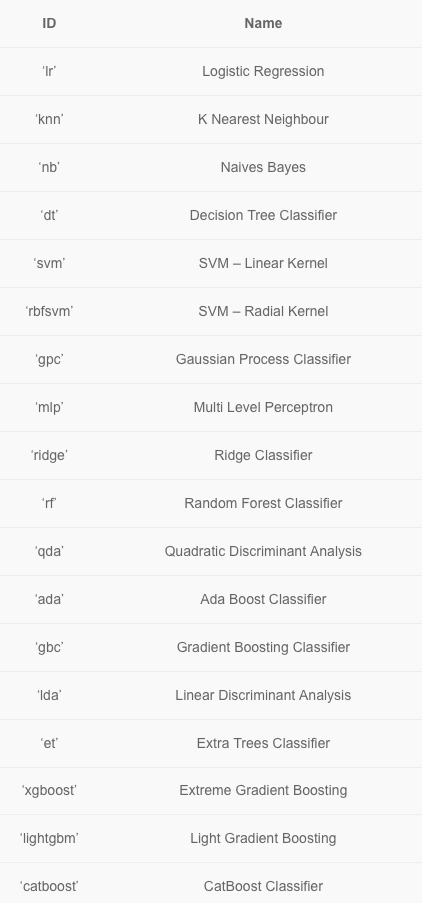

In [3]:
Image('/Users/yoo/Data-dev/algorithm/AutoML_Model.png')

In [15]:
compare_models()

qda = create_model('qda', fold=5, round=2, cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.95,1.00,0.95,0.96,0.95,0.93,0.93
1,0.95,0.99,0.96,0.96,0.95,0.93,0.93
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Mean,0.98,1.00,0.98,0.98,0.98,0.97,0.97
SD,0.02,0.00,0.02,0.02,0.02,0.03,0.03


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [5]:
# Comparison All Machine Learning Model - Pycaret

top5 = compare_models(sort='Accuracy', n_select=5)
top5

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8342,0.8961,0.7438,0.8062,0.7691,0.6407,0.6462,0.4510
ridge,Ridge Classifier,0.8302,0.0000,0.7580,0.7891,0.7684,0.6350,0.6401,0.0130
lda,Linear Discriminant Analysis,0.8288,0.8950,0.7616,0.7850,0.7681,0.6331,0.6383,0.0110
gbc,Gradient Boosting Classifier,0.8221,0.8918,0.7293,0.7884,0.7536,0.6153,0.6201,0.0570
ada,Ada Boost Classifier,0.8088,0.8760,0.7294,0.7585,0.7397,0.5892,0.5934,0.0560
rf,Random Forest Classifier,0.7860,0.8556,0.7009,0.7239,0.7087,0.5402,0.5437,0.2500
nb,Naive Bayes,0.7753,0.8329,0.7791,0.6776,0.7233,0.5361,0.5414,0.0120
et,Extra Trees Classifier,0.7686,0.8163,0.6687,0.7046,0.6830,0.5017,0.5048,0.2100
dt,Decision Tree Classifier,0.7458,0.7305,0.6655,0.6647,0.6614,0.4586,0.4618,0.0120
qda,Quadratic Discriminant Analysis,0.7458,0.8404,0.8398,0.6238,0.7144,0.4954,0.5145,0.0110


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=6497, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=6497,
                 solver='auto', tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
               

In [7]:
# Tuning Top5 model

tuned_top5 = [tune_model(i) for i in top5]
tuned_top5

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.9115,0.6429,0.8182,0.7200,0.5830,0.5925
1,0.8667,0.9517,0.8571,0.8000,0.8276,0.7191,0.7202
2,0.8800,0.9324,0.8571,0.8276,0.8421,0.7454,0.7457
3,0.8267,0.9031,0.7857,0.7586,0.7719,0.6322,0.6325
4,0.8533,0.9229,0.6786,0.9048,0.7755,0.6699,0.6852
5,0.7867,0.8564,0.5357,0.8333,0.6522,0.5086,0.5344
6,0.7600,0.8374,0.6786,0.6786,0.6786,0.4871,0.4871
7,0.8800,0.9164,0.7586,0.9167,0.8302,0.7387,0.7466
8,0.8514,0.8789,0.7500,0.8400,0.7925,0.6772,0.6799
9,0.7838,0.8839,0.7143,0.7143,0.7143,0.5404,0.5404


[LogisticRegression(C=1.315, class_weight={}, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=6497, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=4.23, class_weight=None, copy_X=True, fit_intercept=False,
                 max_iter=None, normalize=True, random_state=6497, solver='auto',
                 tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0001,
                            solver='eigen', store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='deviance', max_depth=9,
                            max_features=1.0, max_leaf_nodes=None,
                            min_impurity_decrease=0, min_impurity_split=None,
            

In [8]:
# Blending Model

blender_top5 = blend_models(estimator_list=tuned_top5)
blender_top5

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.0000,0.6429,0.8571,0.7347,0.6098,0.6238
1,0.8667,0.0000,0.8929,0.7812,0.8333,0.7230,0.7275
2,0.8667,0.0000,0.8571,0.8000,0.8276,0.7191,0.7202
3,0.8400,0.0000,0.8214,0.7667,0.7931,0.6629,0.6640
4,0.8933,0.0000,0.7857,0.9167,0.8462,0.7653,0.7706
5,0.7867,0.0000,0.6071,0.7727,0.6800,0.5234,0.5320
6,0.8000,0.0000,0.7143,0.7407,0.7273,0.5695,0.5697
7,0.8667,0.0000,0.7586,0.8800,0.8148,0.7115,0.7163
8,0.8243,0.0000,0.6786,0.8261,0.7451,0.6130,0.6199
9,0.8108,0.0000,0.7857,0.7333,0.7586,0.6034,0.6043


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.315, class_weight={},
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=6497,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=4.23, class_weight=None,
                                              copy_X=True, fit_interce...
                                                         n_estimators=170,
                        

In [9]:
# Prediction

final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=dataset.iloc[-100:])
prediction

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.07228e-08): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.05169e-08): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.04303e-08): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0692e-08): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label
970,971,MM,240,1,1.75,1.99,0.0,0.30,0,1,0.224526,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM
971,972,MM,241,1,1.86,1.99,0.0,0.30,0,1,0.179621,1.69,1.86,-0.17,No,0.150754,0.000000,0.13,1,MM
972,973,CH,242,1,1.86,1.99,0.0,0.30,0,1,0.143697,1.69,1.86,-0.17,No,0.150754,0.000000,0.13,1,MM
973,974,MM,243,1,1.86,1.99,0.0,0.80,0,1,0.314957,1.19,1.86,-0.67,No,0.402010,0.000000,0.13,1,MM
974,975,MM,244,1,1.86,2.09,0.0,0.00,0,0,0.251966,2.09,1.86,0.23,No,0.000000,0.000000,0.23,1,MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.1,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,CH
1066,1067,CH,256,7,1.86,2.18,0.0,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,CH
1067,1068,MM,257,7,1.86,2.18,0.0,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,CH
1068,1069,CH,261,7,1.86,2.13,0.0,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,CH


In [12]:
# evaluation

print("Prediction Evaluation Score is {}".format(check_metric(prediction['Purchase'], prediction['Label'], metric='Accuracy')))

Prediction Evaluation Score is 0.79
